# comparing RANSAC regression and linear regression 
### RANdomSamplingConsesus algo to be used when outliers are to be accorded for no influence in the estimates 

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

Estimated coefficients (true, linear regression, RANSAC):
40.05104635815054 [20.99778523] [41.39180507]


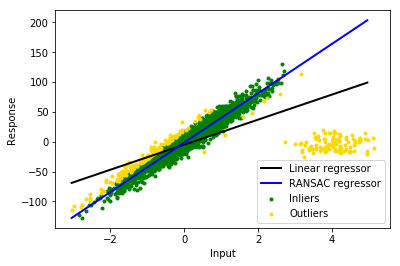

In [8]:
# Adding outlier/noise to data then applying linear regression
# NOTE: you can also do masking of data but it didnt workout good as you have to estimate the limits. 

n_samples = 2000
n_outliers = 100

X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

np.random.seed(0)
X[:n_outliers] = 4 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -4 + 10 * np.random.normal(size=n_outliers)

# case1: linear regression
linr = linear_model.LinearRegression()
linr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = linr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, linr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='green', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='black', linewidth=lw, label='Linear regression')
plt.plot(line_X, line_y_ransac, color='blue', linewidth=lw,
         label='RANSAC regression')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()